In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.ticker import ScalarFormatter

from ipm_util import log_to_dataframe  # https://github.com/JiaweiZhuang/ipm_util
from brokenaxes import brokenaxes

# Read logs

In [2]:
ls -lh ./logs/ipm_profiling/

total 27760
-rw-r--r--  1 zhuangjw  staff   1.4M Sep 29 14:30 N16n576_intelmpi-EFA_4x5met_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   1.3M Oct 20 15:12 N16n576_intelmpi-TCP_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   1.4M Sep 29 14:38 N16n576_openmpi_4x5met_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   2.7M Sep 29 17:22 N32n1152_intelmpi-EFA_4x5met_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   2.9M Sep 30 12:27 N32n1152_openmpi_4x5met_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   346K Sep 29 10:31 N4n144_intelmpi-EFA_4x5met_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   346K Oct 18 13:02 N4n144_intelmpi-TCP_4x5met_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   367K Oct 18 12:59 N4n144_openmpi_4x5met_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   691K Sep 26 13:46 N8n288_intelmpi-EFA_4x5met_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   690K Sep 27 10:08 N8n288_intelmpi-TCP_4x5met_nooutput.ipm.xml
-rw-r--r--  1 zhuangjw  staff   733K Sep 29 11:20 N8n288_openmp

In [3]:
impi_log_list = [
    './logs/ipm_profiling/N{0}n{1}_intelmpi-EFA_4x5met_nooutput.ipm.xml'.format(N, N*36)
    for N in [4, 8, 16, 32]
]
impi_log_list

['./logs/ipm_profiling/N4n144_intelmpi-EFA_4x5met_nooutput.ipm.xml',
 './logs/ipm_profiling/N8n288_intelmpi-EFA_4x5met_nooutput.ipm.xml',
 './logs/ipm_profiling/N16n576_intelmpi-EFA_4x5met_nooutput.ipm.xml',
 './logs/ipm_profiling/N32n1152_intelmpi-EFA_4x5met_nooutput.ipm.xml']

In [4]:
%time df_impi_list = [log_to_dataframe(log) for log in impi_log_list]

CPU times: user 4.75 s, sys: 53 ms, total: 4.8 s
Wall time: 4.83 s


In [5]:
ompi_log_list = [
    './logs/ipm_profiling/N{0}n{1}_openmpi_4x5met_nooutput.ipm.xml'.format(N, N*36)
    for N in [4, 8, 16, 32]
]
ompi_log_list

['./logs/ipm_profiling/N4n144_openmpi_4x5met_nooutput.ipm.xml',
 './logs/ipm_profiling/N8n288_openmpi_4x5met_nooutput.ipm.xml',
 './logs/ipm_profiling/N16n576_openmpi_4x5met_nooutput.ipm.xml',
 './logs/ipm_profiling/N32n1152_openmpi_4x5met_nooutput.ipm.xml']

In [6]:
%time df_ompi_list = [log_to_dataframe(log) for log in ompi_log_list]

CPU times: user 4.71 s, sys: 39.3 ms, total: 4.75 s
Wall time: 4.82 s


In [7]:
df_impi_list[0].tail()

name,MPI_Init,MPI_Comm_rank,MPI_Comm_size,MPI_Isend,MPI_Recv,MPI_Irecv,MPI_Wait,MPI_Bcast,MPI_Barrier,MPI_Gatherv,MPI_Scatterv,MPI_Allgather,MPI_Allreduce,MPI_Comm_group,MPI_Comm_create,MPI_Comm_split
rank,,,,,,,,,,,,,,,,
139,0.0,0.000194,0.001044,8.6395,0.000606,0.97202,596.17,1020.2,13889.0,12.8410,94.604,0.001392,467.28,0.000003,0.006457,0.17120
140,0.0,0.000150,0.001052,6.4668,0.000341,0.97072,619.02,1020.2,14168.0,9.0084,94.605,0.001073,442.53,0.000004,0.006507,0.17079
141,0.0,0.000186,0.001066,4.9191,0.001122,0.96730,584.90,1020.3,14254.0,10.4210,94.614,0.000928,416.03,0.000003,0.006746,0.17099
142,0.0,0.000138,0.001069,3.6588,0.002397,0.97237,562.50,1020.1,13958.0,11.6190,94.531,0.001097,403.80,0.000004,0.006702,0.17122
143,0.0,0.000173,0.001046,3.4114,0.003327,0.95034,435.67,1020.3,13676.0,12.6740,94.615,0.001063,507.92,0.000004,0.006600,0.17029


In [8]:
df_impi_list[0].tail().mean().sort_values()

name
MPI_Init               0.000000
MPI_Comm_group         0.000004
MPI_Comm_rank          0.000168
MPI_Comm_size          0.001055
MPI_Allgather          0.001111
MPI_Recv               0.001559
MPI_Comm_create        0.006602
MPI_Comm_split         0.170898
MPI_Irecv              0.966550
MPI_Isend              5.419120
MPI_Gatherv           11.312680
MPI_Scatterv          94.593800
MPI_Allreduce        447.512000
MPI_Wait             559.652000
MPI_Bcast           1020.220000
MPI_Barrier        13989.000000
dtype: float64

# Show statistics

In [9]:
major_columns = [
    'MPI_Barrier', 'MPI_Bcast', 'MPI_Allreduce', 'MPI_Wait', 'MPI_Scatterv']

def mean_df(df_list):
    '''Average over all ranks; extract major columns'''
    df_mean = pd.concat([df[major_columns].mean() for df in df_list], axis=1).T
    df_mean.index = [144, 288, 576, 1152]
    df_mean.index.name = 'core'
    return df_mean

mean_impi = mean_df(df_impi_list)
mean_impi

name,MPI_Barrier,MPI_Bcast,MPI_Allreduce,MPI_Wait,MPI_Scatterv
core,,,,,
144,13237.152778,1012.777347,441.303611,313.282708,93.711376
288,7892.902431,915.997903,315.397292,264.057951,71.130900
576,4398.769444,933.306441,219.865069,227.424878,71.906409
1152,2534.985590,958.795104,179.971660,455.441771,76.061970


In [10]:
mean_ompi = pd.concat([df[major_columns].mean() for df in df_ompi_list], axis=1).T
mean_ompi.index = [144, 288, 576, 1152]
mean_ompi.index.name = 'core'

mean_ompi = mean_df(df_ompi_list)
mean_ompi

name,MPI_Barrier,MPI_Bcast,MPI_Allreduce,MPI_Wait,MPI_Scatterv
core,,,,,
144,13316.185417,626.964306,380.528125,309.667986,91.228549
288,7917.852778,842.739271,309.154653,256.930729,73.166267
576,4687.262847,1726.331597,402.136076,368.096354,107.603682
1152,3151.754080,3727.461806,667.764470,1259.830651,173.598707


# Compare MPI calls

In [11]:
plt.rcParams['font.size'] = 14

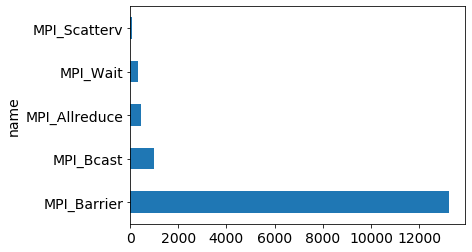

In [12]:
mean_impi.iloc[0].plot.barh()

Text(0.5, 1.0, 'IPM profiling (IntelMPI-EFA, 144 cores)')

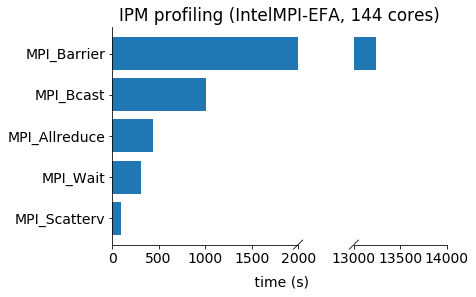

In [13]:
# https://github.com/bendichter/brokenaxes/issues/11#issuecomment-373650734

bax = brokenaxes(xlims=((0, 2000), (13000, 14000)), wspace=0.4)
bax.barh(mean_impi.columns[::-1], mean_impi.values[0][::-1])

bax.set_xlabel('\n time (s)')
bax.set_title('IPM profiling (IntelMPI-EFA, 144 cores)')

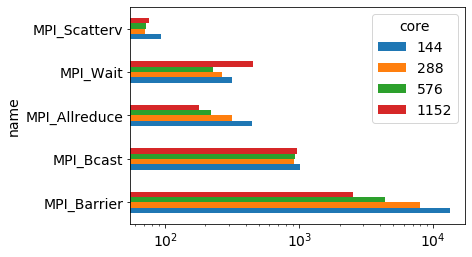

In [14]:
mean_impi.T.plot.barh(logx=True)

In [15]:
df_compare = pd.concat([mean_impi.iloc[-1], mean_ompi.iloc[-1]], axis=1, 
                       keys=['IntelMPI-EFA', 'OpenMPI-TCP'])
df_compare.index.name = ''
df_compare

,IntelMPI-EFA,OpenMPI-TCP
,,
MPI_Barrier,2534.985590,3151.754080
MPI_Bcast,958.795104,3727.461806
MPI_Allreduce,179.971660,667.764470
MPI_Wait,455.441771,1259.830651
MPI_Scatterv,76.061970,173.598707


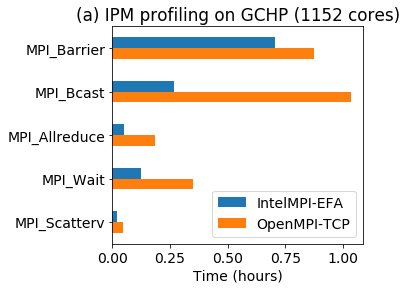

In [16]:
(df_compare/3600).iloc[::-1, ::-1].plot.barh(legend='reverse', color=['C1', 'C0'], figsize=[4.5, 4])
plt.title('(a) IPM profiling on GCHP (1152 cores)')
plt.xlabel('Time (hours)')
plt.savefig('gchp-all-mpi.png', dpi=300, bbox_inches='tight')

# Plot MPI scaling

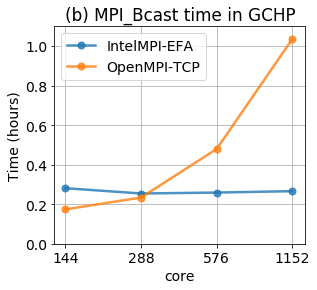

In [17]:
fig, ax = plt.subplots(1, 1, figsize=[4.5, 4])

plot_kwargs = dict(ax=ax, linestyle='-', marker='o', linewidth=2.5, markersize=7.0, alpha=0.8)
(mean_impi['MPI_Bcast']/3600).plot(**plot_kwargs, label='IntelMPI-EFA')
(mean_ompi['MPI_Bcast']/3600).plot(**plot_kwargs, label='OpenMPI-TCP')

ax.set_title('(b) MPI_Bcast time in GCHP')
ax.legend()
ax.grid()

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.minorticks_off()

ax.set_xticks(mean_impi.index)
ax.set_xlim(130, 1300)

ax.set_ylabel('Time (hours)')
ax.set_ylim(0, 1.1)

fig.savefig('gchp_mpi_bcast.png', dpi=300, bbox_inches='tight')